<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Avia%C3%A7%C3%A3o_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
df_train= pd.read_excel('Data_Train.xlsx')
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df_train.describe(datetime_is_numeric=False, exclude=[object])

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [ ]:
df_train.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_train.shape

(10462, 11)

In [ ]:
df_train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df_train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
# Neste data set não tem target
df_test= pd.read_excel('Test_set.xlsx')
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


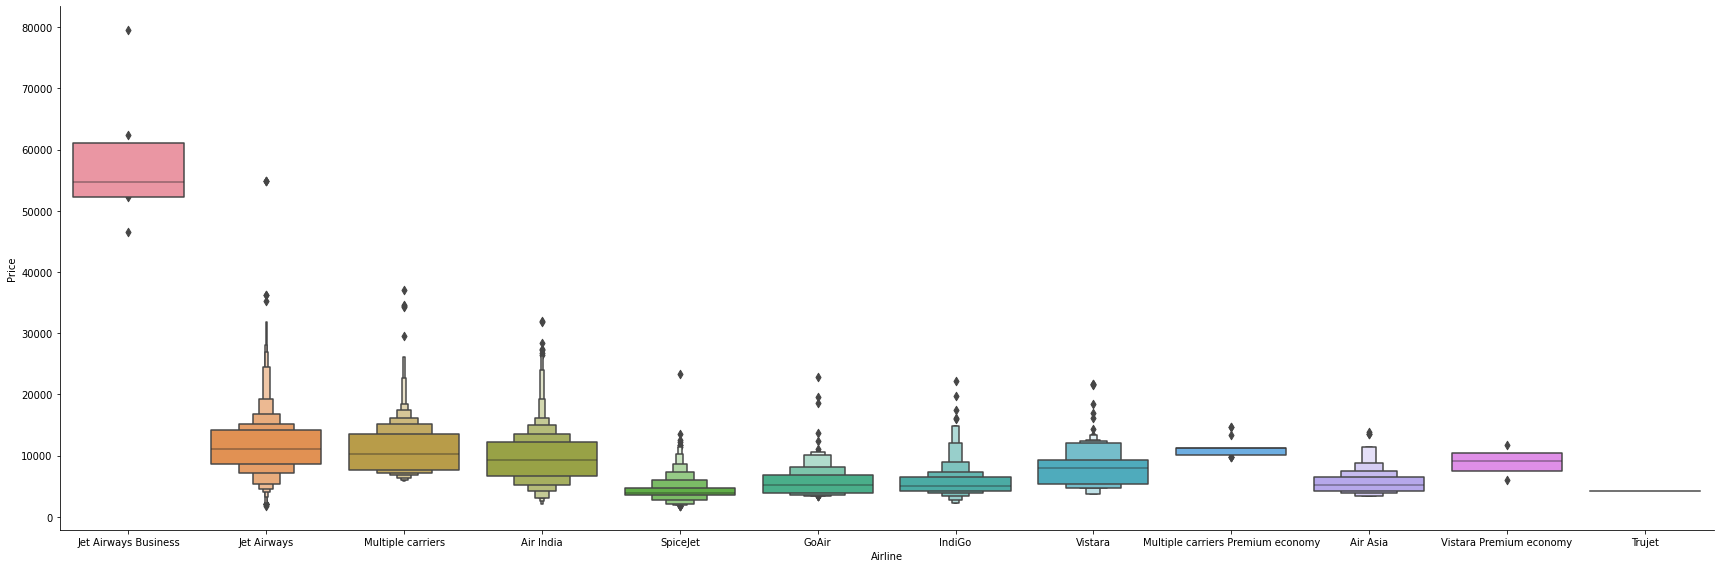

In [ ]:
sns.catplot(y="Price", x= "Airline", data= df_train.sort_values("Price", ascending=False), kind="boxen", height=8, aspect=3)

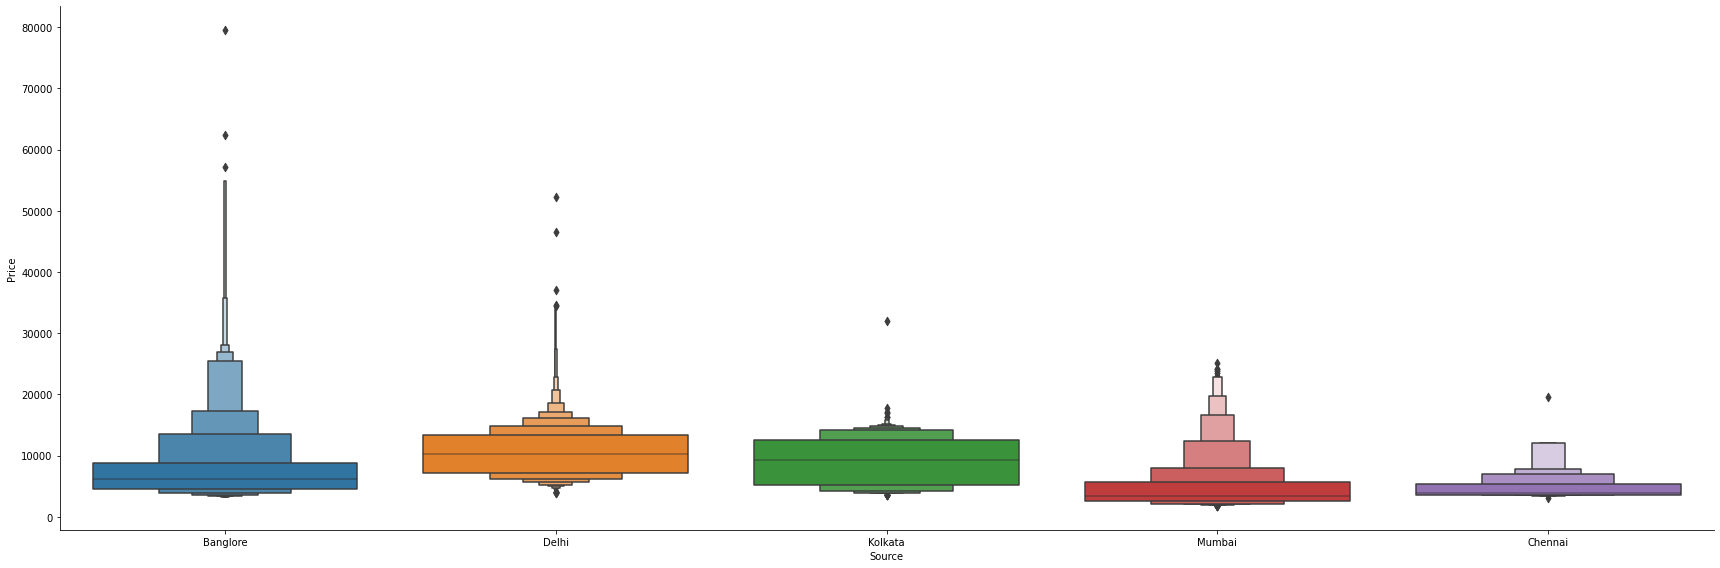

In [ ]:
sns.catplot(y="Price", x= "Source", data= df_train.sort_values("Price", ascending=False), kind="boxen", height=8, aspect=3)

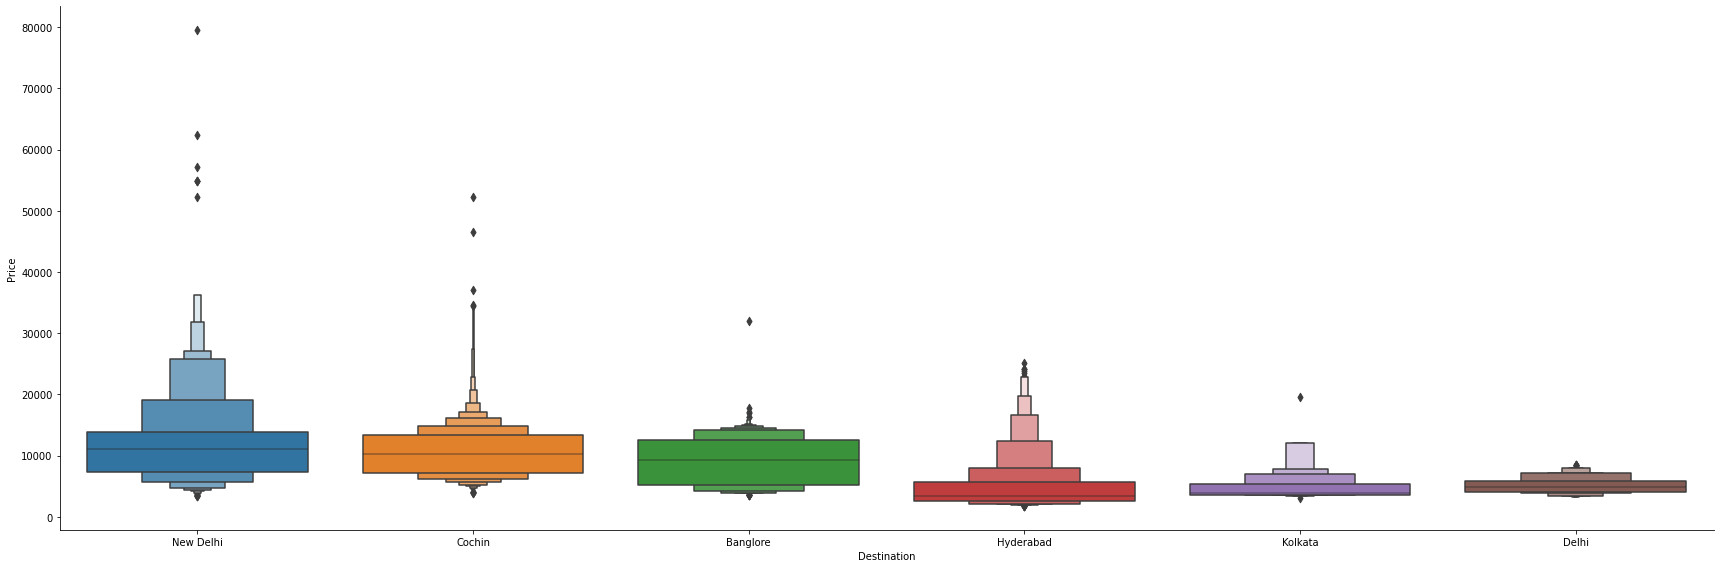

In [ ]:
sns.catplot(y="Price", x= "Destination", data= df_train.sort_values("Price", ascending=False), kind="boxen", height=8, aspect=3)

In [ ]:
df_train.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [ ]:
df_train['Duration']= df_train['Duration'].str.replace("h", '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
df_train.Duration

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10462, dtype: int64

In [ ]:
df_test['Duration']= df_test['Duration'].str.replace("h", '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
df_test.Duration

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: int64

In [ ]:
df_train.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [ ]:
df_train['Journey_day']= df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train['Journey_month']= df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train['Journey_year']= df_train['Date_of_Journey'].str.split('/').str[2].astype(int)
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019


In [ ]:
df_train['Dep_hour']= pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min']= pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop(['Dep_Time'], axis=1, inplace=True)
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,2019,5,50


In [ ]:
df_train['Arrival_hour']= pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min']= pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop(['Arrival_Time'], axis=1, inplace=True)

In [ ]:
df_test['Journey_day']= df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Journey_month']= df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test['Journey_year']= df_test['Date_of_Journey'].str.split('/').str[2].astype(int)

df_test['Dep_hour']= pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']= pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop(['Dep_Time'], axis=1, inplace=True)

df_test['Arrival_hour']= pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']= pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop(['Arrival_Time'], axis=1, inplace=True)



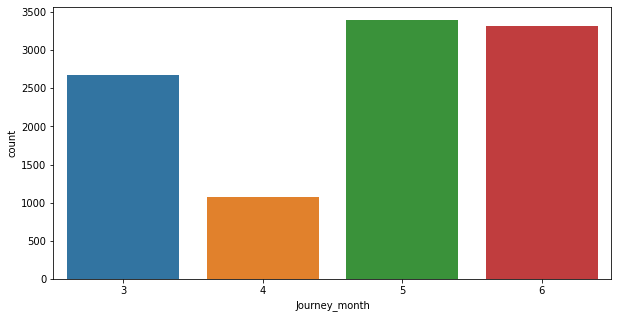

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Journey_month', data= df_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

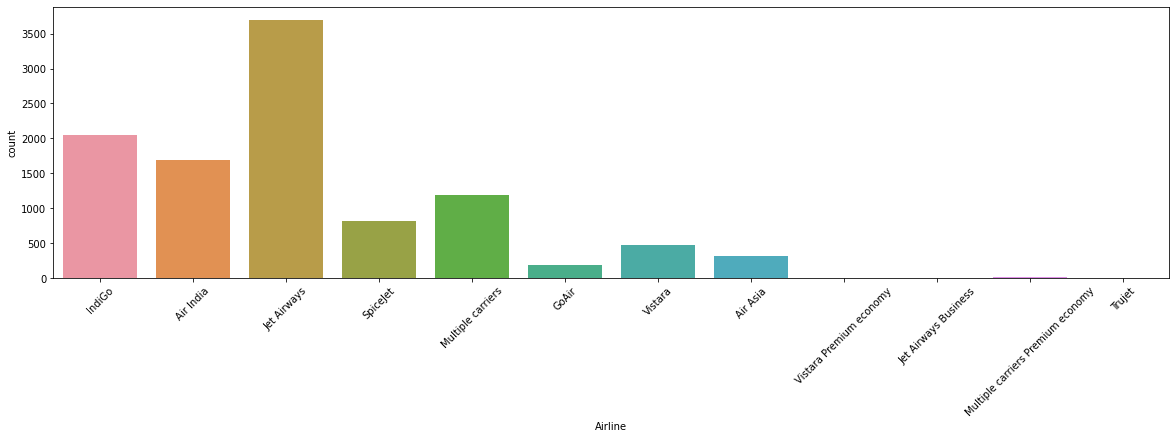

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x='Airline', data= df_train)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

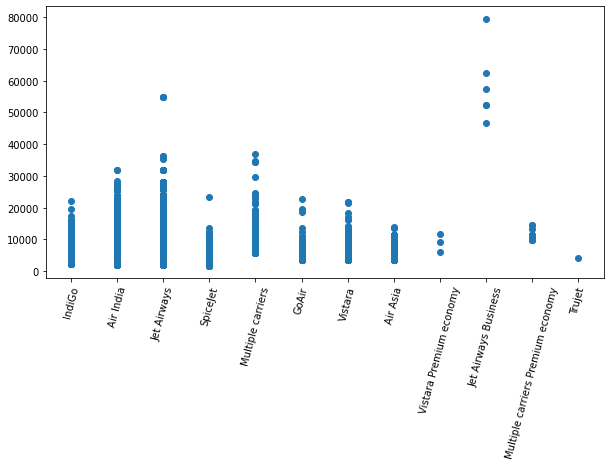

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xticks(rotation=75)

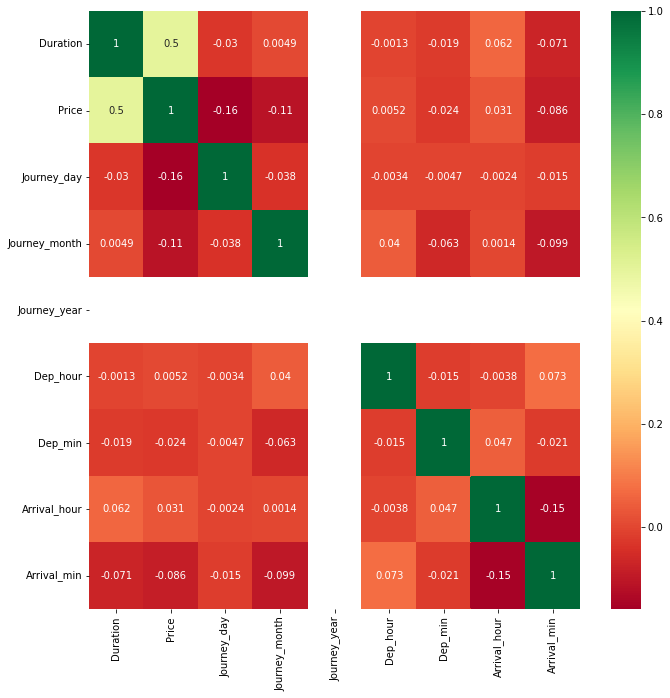

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

In [ ]:
data= df_train.drop(['Price'], axis=1)

In [ ]:
train_categorical_data= data.select_dtypes(exclude=['int64', 'float', 'int32'])
train_numerical_data= data.select_dtypes(include=['int64', 'float', 'int32'])

test_categorical_data= data.select_dtypes(exclude=['int64', 'float', 'int32'])
test_numerical_data= data.select_dtypes(include=['int64', 'float', 'int32'])

In [ ]:
train_categorical_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
train_numerical_data.head()

,Duration,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,24,3,2019,22,20,1,10
1,445,1,5,2019,5,50,13,15
2,1140,9,6,2019,9,25,4,25
3,325,12,5,2019,18,5,23,30
4,285,1,3,2019,16,50,21,35


In [ ]:
le= LabelEncoder()
train_categorical_data= train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data= test_categorical_data.apply(LabelEncoder().fit_transform)

In [ ]:
x= pd.concat([train_categorical_data, train_numerical_data], axis=1)

In [ ]:
y= df_train['Price']

In [ ]:
test_set= pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [ ]:
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,24,0,5,18,4,8,170,24,3,2019,22,20,1,10
1,1,6,3,0,84,1,8,445,1,5,2019,5,50,13,15
2,4,43,2,1,118,1,8,1140,9,6,2019,9,25,4,25
3,3,10,3,0,91,0,8,325,12,5,2019,18,5,23,30
4,3,0,0,5,29,0,8,285,1,3,2019,16,50,21,35


In [ ]:
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,24,0,5,18,4,8,170,24,3,2019,22,20,1,10
1,1,6,3,0,84,1,8,445,1,5,2019,5,50,13,15
2,4,43,2,1,118,1,8,1140,9,6,2019,9,25,4,25
3,3,10,3,0,91,0,8,325,12,5,2019,18,5,23,30
4,3,0,0,5,29,0,8,285,1,3,2019,16,50,21,35


In [ ]:
#Calculando Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size= 0.3)

In [ ]:
print("O tamanho da entrada do treino: ", x_train.shape)
print("O tamanho da saída do treino: ", y_train.shape)
print("O tamanho da entrada do teste: ", x_test.shape)
print("O tamanho da saída do teste: ", y_test.shape)

O tamanho da entrada do treino:  (7323, 15)
O tamanho da saída do treino:  (7323,)
O tamanho da entrada do teste:  (3139, 15)
O tamanho da saída do teste:  (3139,)


In [ ]:
depth = list(range(1, 11))

param_grid = dict(max_depth= depth)

In [ ]:
param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
y_train_pred= tree.predict(x_train)
y_test_pred= tree.predict(x_test)

In [ ]:
y_train_pred

array([ 4685.79487179, 10593.32258065,  5391.25296443, ...,
        8741.13636364, 12598.61290323, 12598.61290323])

In [ ]:
tree.best_params_

{'max_depth': 10}

In [ ]:
#Avalia dados de treino
print(sqrt(mse(y_train.values, y_train_pred)))
print(round(mean_absolute_percentage_error(y_train.values, y_train_pred), 2))
print( r2_score(y_train.values, y_train_pred))  #Tivemos 90% de acerto para os dados de treino

1414.3455830851779
9.97
0.9071170683464512


In [ ]:
#Avalia dados de teste
print(sqrt(mse(y_test.values, y_test_pred)))
print(round(mean_absolute_percentage_error(y_test.values, y_test_pred), 2))
print( r2_score(y_test.values, y_test_pred))  #Tivemos 78% de acerto para os dados de teste. A minha máquina tem uma assertividade de 78%, 
                                              #ou seja não tivemos overfit, se o valor fosse muito baixo aí teria overfit

2133.7733401725473
12.48
0.7835299920386488
